In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2023-02-07 16:19:42.365860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
W_true = 2
b_true = 0.5

In [5]:
# generate few x values between 0 and 3
x = np.linspace(0, 3, 130)
# generate random addition to make sure it's not a straight line y=mx + c
y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

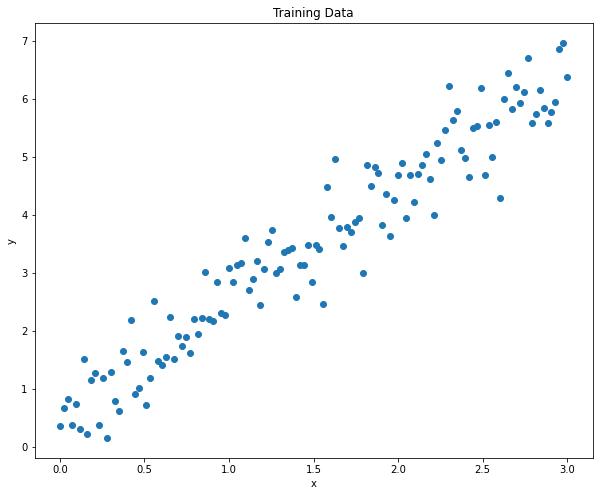

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.xlabel("x") # explanatory variable
plt.ylabel("y") # target
plt.title("Training Data")
plt.show()

In [8]:
class LinearModel:
    def __init__(self): #instantiating the trainable variables
        self.weight = tf.Variable(np.random.randn(), name = "W")
        self.bias = tf.Variable(np.random.randn(), name = "b")
    def __call__(self, x):
        return self.weight * x + self.bias
# call is invoked in the forward pass (linear transformation of x)

In [9]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred)) #MSE loss of model

In [11]:
def train(linear_model, x, y, lr = 0.01): #lr is learning rate
    with tf.GradientTape() as tape:
        y_pred = linear_model(x) #forward pass
        current_loss = loss(y, y_pred)
    #gradients of the loss with respect to weight and bias    
    d_weight, d_bias = tape.gradient(current_loss,
                                    [linear_model.weight, linear_model.bias])
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)
#Using learning rate subtract loss from weights and biases in model

In [12]:
linear_model = LinearModel()
weights, biases = [], [] #array to store values
epochs = 10 #more epochs increases accuracy
lr = 0.15

2023-02-07 16:32:58.244797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
for epoch_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=lr) #function that calculates gradients and updates w/b values
    
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 26.260536193847656
Epoch count 1: Loss value: 0.7667754292488098
Epoch count 2: Loss value: 0.2414620965719223
Epoch count 3: Loss value: 0.23063771426677704
Epoch count 4: Loss value: 0.23041468858718872
Epoch count 5: Loss value: 0.23041006922721863
Epoch count 6: Loss value: 0.23040997982025146
Epoch count 7: Loss value: 0.23040996491909027
Epoch count 8: Loss value: 0.23040997982025146
Epoch count 9: Loss value: 0.23040997982025146


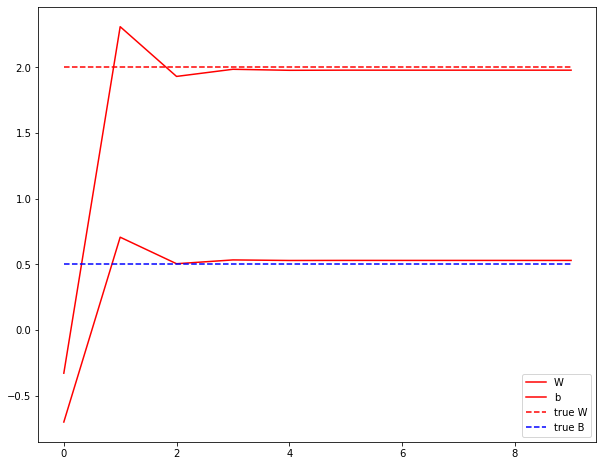

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'r')
plt.plot([W_true]*epochs, 'r--', [b_true]*epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true B'])
plt.show()
#shows how model parameters converge to final value
# x axis is number of epochs, y axis is weight and bias values
# dotted line is true values used to artifically generate data
# solid line represent W/B in linear model during different epochs

In [17]:
linear_model.weight.numpy(), linear_model.bias.numpy()
# final values after epochs

(1.9782056, 0.53045887)

In [18]:
rmse = loss(y, linear_model(x))
rmse.numpy()
#final MSE

0.23040998

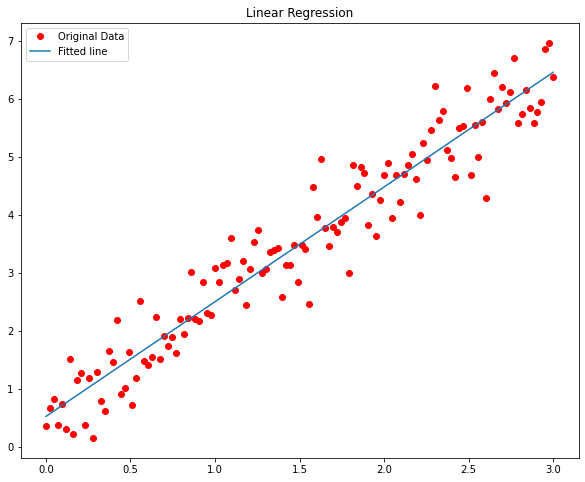

In [19]:
# scatter plot comparing original data with model line
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'ro', label='Original Data')
plt.plot(x, linear_model(x), label = 'Fitted line')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [20]:
# in real life, won't be choosing weights and biases
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
x.shape, y.shape

((130,), (130,))

In [22]:
x = pd.DataFrame(x, columns = ['x'])
y = pd.DataFrame(y, columns = ['y'])

In [23]:
x.head()

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023


In [24]:
x.shape, y.shape

((130, 1), (130, 1))

In [26]:
#Sequential model: output of one layer feeds into the input of the next layer
model = keras.Sequential([layers.Dense(1, input_shape = (1,), activation = 'linear')])
#one dense layer in network, input is number of features (here only x)
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
#Stochastic gradient descent optimizer
model.compile(loss = 'mse', metrics = ['mse'], optimizer=optimizer)
#configures learning parameters, here we want mse with the SGD optimizer

In [27]:
#train the model
model.fit(x, y, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 44.2628 - mse: 44.2628
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 41.5573 - mse: 41.5573
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 38.0503 - mse: 38.0503
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 35.3249 - mse: 35.3249
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 32.6502 - mse: 32.6502
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 30.1430 - mse: 30.1430
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 28.0752 - mse: 28.0752
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 25.9993 - mse: 25.9993
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 24.2681 - mse: 24.2681
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 22.4272 - mse: 22.4272
Epoch 11/100
5/5 [==============================] - 0s 3ms/

5/5 [==============================] - 0s 2ms/step - loss: 0.5029 - mse: 0.5029
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4978 - mse: 0.4978
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4926 - mse: 0.4926
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4903 - mse: 0.4903
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4871 - mse: 0.4871
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4823 - mse: 0.4823
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4805 - mse: 0.4805
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4759 - mse: 0.4759
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4731 - mse: 0.4731
Epoch 97/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4699 - mse: 0.4699
Epoch 98/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4659 - ms

In [28]:
y_pred = model.predict(x)

5/5 [==============================] - 0s 1ms/step


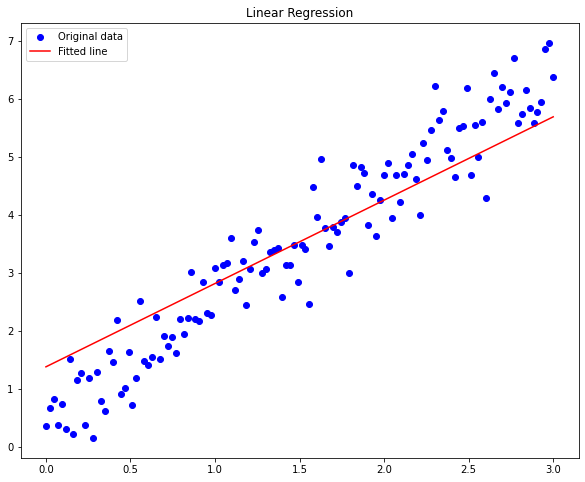

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', label='Original data')
plt.plot(x, y_pred, color = 'r', label = 'Fitted line')
plt.title('Linear Regression')
plt.legend()
plt.show()